In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [2]:
th = pd.read_csv("./th_quantification.csv", sep=";", usecols=['Animal', 'Sample', 'ROI', 'Area', 'Mean', 'Min', 'Max', 'Notes'])

In [3]:
pda = ["NWE00130", "NWE00160", "NWE00161", "NWE00163", "NWE00162", "NWE00164"]
h = ["NWE00131", "NWE00166", "NWE00197"]

In [4]:
ROI = [1, 2, 3]

In [5]:
def str2float(a):
    if type(a)==str:
        a = a.replace(",", ".")
    return float(a)

In [6]:
th["Mean"] = th["Mean"].apply(str2float)
th = th[th["Animal"].isin(pda)]
th = th[th["ROI"].isin(ROI)]

In [7]:
th_animal = th.query("ROI != 3.0")
th_animal = th_animal[["Animal", "Mean", "ROI"]].groupby(["Animal", "ROI"]).mean()
th_animal.sort_values(inplace=True, by="ROI", ascending=False)
th_animal.reset_index(level=["ROI"], inplace=True)
th_animal["ROI"] = th_animal["ROI"].apply(lambda x: x-1)

/tmp/ipykernel_3603116/2814432165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=th_animal, y="Mean", x="ROI", palette=["#1CA152", "k"], ax=ax, legend=False)


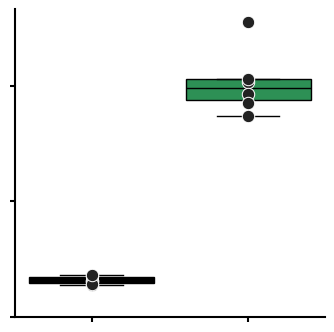

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(data=th_animal, y="Mean", x="ROI", palette=["#1CA152", "k"], ax=ax, legend=False)
sns.scatterplot(data=th_animal, x="ROI", y="Mean", color="#222222", ax=ax, zorder=10, s=80)
ax.set_xticks([0, 1], labels=[])
ax.set_yticks(ax.get_yticks()[::3], labels=[])
ax.xaxis.set_inverted(True) 
#ax.set_xlabel("Event Type")
#ax.set_ylabel("Beta Band Value")
ax.set_ylabel("")
ax.set_xlabel("")
ax.spines[['right', 'top']].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)

plt.savefig("th_staining.svg", transparent=True)

In [10]:
th_animal.groupby("ROI")["Mean"].mean()

ROI
0.0    30.415750
1.0     4.782933
Name: Mean, dtype: float64

In [11]:
th_animal.groupby("ROI")["Mean"].std()

ROI
0.0    4.222887
1.0    0.512047
Name: Mean, dtype: float64

In [19]:
ttest_rel(th_animal["Mean"][th_animal["ROI"]==0.0], th_animal["Mean"][th_animal["ROI"]==1.0])

TtestResult(statistic=14.535739007315282, pvalue=2.7819151959730304e-05, df=5)

In [18]:
th_animal

,ROI,Mean
Animal,,
NWE00130,1.0,5.371500
NWE00160,1.0,4.696600
NWE00161,1.0,4.222833
NWE00162,1.0,4.690833
NWE00163,1.0,4.299500
NWE00164,1.0,5.416333
NWE00130,0.0,30.522833
NWE00160,0.0,28.957000
NWE00161,0.0,27.820167
